In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loan = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\AnalyticsVidhya\\Loan Prediction 3\\train.csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Checking Missing Values

In [3]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
# Filling missing values with mean or mode.
#1. Loan_Amount
loanamnt_mean = loan.LoanAmount.mean()
loan['LoanAmount'] = loan['LoanAmount'].fillna(loanamnt_mean)

#2. Loan_Amount_Term
loan_term = loan.Loan_Amount_Term.mode()[0]
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].fillna(loan_term)

#3. Credit_History
credit_mode = loan.Credit_History.mode()[0]
loan['Credit_History'] = loan['Credit_History'].fillna(credit_mode)

#4. Self_Employed
selfemp_mode = loan.Self_Employed.mode()[0]
loan['Self_Employed'] = loan['Self_Employed'].fillna(selfemp_mode)

#5. Dependents
dep_mode = loan.Dependents.mode()[0]
loan['Dependents'] = loan['Dependents'].fillna(dep_mode)

#6. Gender
gender_mode = loan.Gender.mode()[0]
loan['Gender'] = loan['Gender'].fillna(gender_mode)

#7. Married
married_mode = loan.Married.mode()[0]
loan['Married'] = loan['Married'].fillna(married_mode)

In [5]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Preprocessing will be applied to this dataset based on the results we got from the Data Analysis Kernel.

### Numerical Features

#### 1. Applicant Income

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


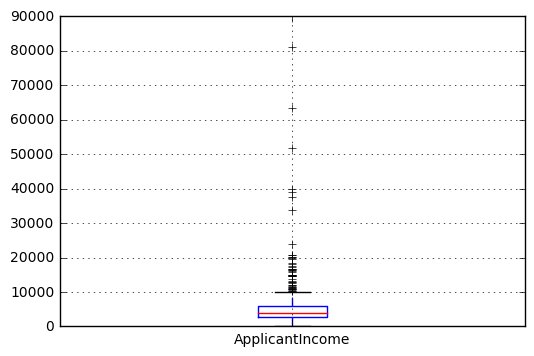

In [6]:
#1. Applicant Income
print(loan.ApplicantIncome.describe())
loan.boxplot(column='ApplicantIncome')

mean = 5403, standard deviation = 6109.

The std of this column is too much, due to the presence of extreme outliers. Now I will keep those points which are within 3 std
from the mean and delete the rest.

In [7]:
def reject_outlier(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u-3*s < e < u+3*s)]
    return filtered

new_filtered = reject_outlier(loan['ApplicantIncome'])

                  0
count    606.000000
mean    4863.217822
std     3390.043519
min      150.000000
25%     2873.500000
50%     3756.000000
75%     5703.000000
max    20833.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000041BA295F8>]], dtype=object)

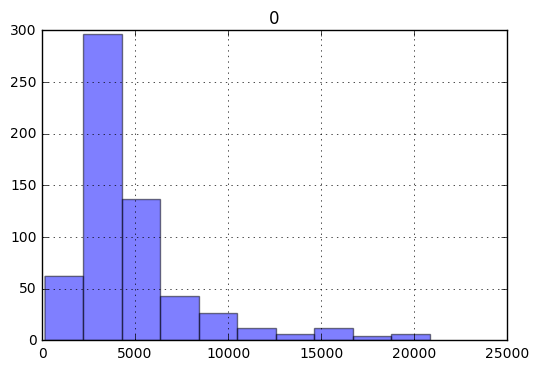

In [8]:
new_filtered = pd.DataFrame(new_filtered)
print(new_filtered.describe())
new_filtered.hist(alpha=0.5)

In [9]:
# Applying the changes to the dataset
loan = loan[loan['ApplicantIncome'] < 13651]

count      582.000000
mean      1672.505017
std       2971.372575
min          0.000000
25%          0.000000
50%       1301.000000
75%       2333.000000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


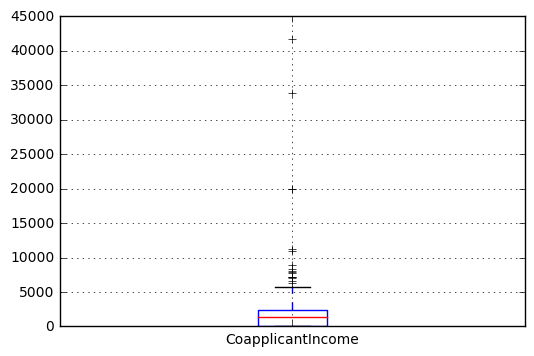

In [10]:
#2. CoapplicantIncome
print(loan.CoapplicantIncome.describe())
loan.boxplot(column='CoapplicantIncome')

mean = 1484, standard deviation = 1767.

The std of this column is too much, due to the presence of extreme outliers. Now I will keep those points which are within 3 std
from the mean and delete the rest.

                 0
count   576.000000
mean   1450.739444
std    1676.616615
min       0.000000
25%       0.000000
50%    1283.500000
75%    2303.000000
max    8980.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000041CAA1198>]], dtype=object)

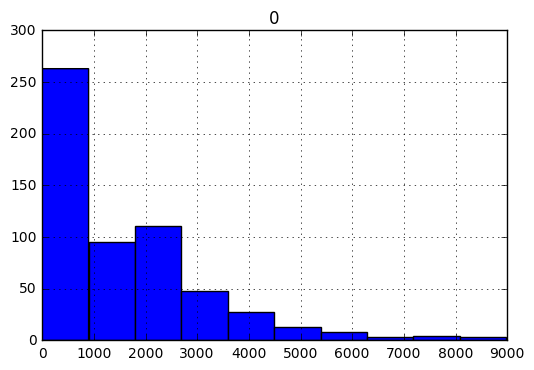

In [11]:
new_filtrd = reject_outlier(loan['CoapplicantIncome'])
new_filtrd = pd.DataFrame(new_filtrd)
print(new_filtrd.describe())
new_filtrd.hist()

In [12]:
# Applying the changes to the dataset
loan = loan[loan['CoapplicantIncome'] < 6250]

count    565.000000
mean     134.017089
std       56.711759
min        9.000000
25%      100.000000
50%      127.000000
75%      158.000000
max      496.000000
Name: LoanAmount, dtype: float64


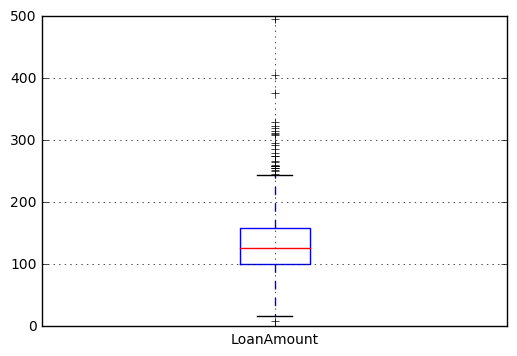

In [13]:
#3. Loan_Amount
print(loan.LoanAmount.describe())
loan.boxplot(column='LoanAmount')

                0
count  555.000000
mean   130.130911
std     48.579665
min      9.000000
25%    100.000000
50%    125.000000
75%    155.000000
max    296.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000041CB7CD68>]], dtype=object)

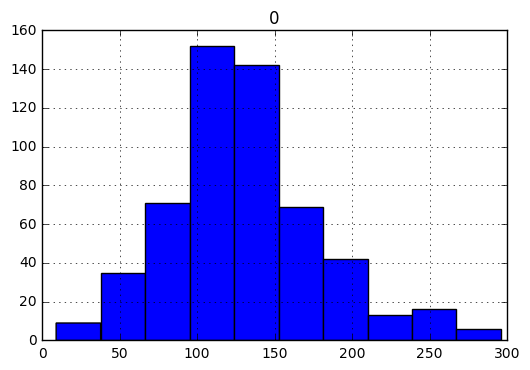

In [14]:
new_filtrd1 = reject_outlier(loan['LoanAmount'])
new_filtrd1 = pd.DataFrame(new_filtrd1)
print(new_filtrd1.describe())
new_filtrd1.hist()

In [15]:
# Applying the changes to the dataset
loan = loan[loan['LoanAmount'] < 297]

### Categorical Features

#### 1. Loan Amount Term

In [16]:
#lets divide this column into 3 parts:
loan['Term_bins'] = pd.cut(loan.Loan_Amount_Term, bins=[0,160,320,500], labels=['low','medium','high'])

In [17]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Term_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,high
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,high
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,high
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,high
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,high


In [18]:
loan = loan.drop(['Loan_ID','Loan_Amount_Term'], axis=1)

In [19]:
genderr = {'Female':0,'Male':1}
marriedd = {'No':0,'Yes':1}
Dependentss = {'0':0, '1':1,'2':2,'3+':3} 
educationn = {'Not Graduate':0, 'Graduate':1}
self_emp = {'No':0,'Yes':1}
prop_area = {'Rural':0,'Semiurban':1,'Urban':2}
amount = {'low':0,'medium':1,'high':2}
status = {'N':0,'Y':1}

loan['Gender'] = loan.Gender.map(genderr)
loan['Married'] = loan.Married.map(marriedd)
loan['Dependents'] = loan.Dependents.map(Dependentss)
loan['Education'] = loan.Education.map(educationn)
loan['Self_Employed'] = loan.Self_Employed.map(self_emp)
loan['Property_Area'] = loan.Property_Area.map(prop_area)
loan['Term_bins'] = loan.Term_bins.map(amount)
loan['Loan_Status'] = loan.Loan_Status.map(status)

In [20]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Term_bins
0,1,0,0,1,0,5849,0.0,146.412162,1.0,2,1,2
1,1,1,1,1,0,4583,1508.0,128.000000,1.0,0,0,2
2,1,1,0,1,1,3000,0.0,66.000000,1.0,2,1,2
3,1,1,0,0,0,2583,2358.0,120.000000,1.0,2,1,2
4,1,0,0,1,0,6000,0.0,141.000000,1.0,2,1,2


In [21]:
#saving preprocessed data to a new csv file.
loan.to_csv("New_Loan.csv", index=False)

### Test Data

In [22]:
test = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\AnalyticsVidhya\\Loan Prediction 3\\test.csv")

In [23]:
#1. Loan_Amount
loanamnt_mean = test.LoanAmount.mean()
test['LoanAmount'] = test['LoanAmount'].fillna(loanamnt_mean)


#2. Loan_Amount_Term
loan_term = test.Loan_Amount_Term.mode()[0]
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(loan_term)


#3. Credit_History
credit_mode = test.Credit_History.mode()[0]
test['Credit_History'] = test['Credit_History'].fillna(credit_mode)


#4. Self_Employed
selfemp_mode = test.Self_Employed.mode()[0]
test['Self_Employed'] = test['Self_Employed'].fillna(selfemp_mode)


#5. Dependents
dep_mode = test.Dependents.mode()[0]
test['Dependents'] = test['Dependents'].fillna(dep_mode)

#6. Gender
gender_mode = test.Gender.mode()[0]
test['Gender'] = test['Gender'].fillna(gender_mode)


#7. Married

married_mode = test.Married.mode()[0]
test['Married'] = test['Married'].fillna(married_mode)

In [24]:
test['term_bins'] = pd.cut(test['Loan_Amount_Term'], bins=[-1,160,320,500], labels=['low','medium','high'])

In [25]:
test = test.drop(['Loan_Amount_Term'], axis=1)

In [26]:
genderr = {'Female':0,'Male':1}
marriedd = {'No':0,'Yes':1}
Dependentss = {'0':0, '1':1,'2':2,'3+':3} 
educationn = {'Not Graduate':0, 'Graduate':1}
self_emp = {'No':0,'Yes':1}
prop_area = {'Rural':0,'Semiurban':1,'Urban':2}
amount = {'low':0,'medium':1,'high':2}
status = {'N':0,'Y':1}

test['Gender'] = test.Gender.map(genderr)
test['Married'] = test.Married.map(marriedd)
test['Dependents'] = test.Dependents.map(Dependentss)
test['Education'] = test.Education.map(educationn)
test['Self_Employed'] = test.Self_Employed.map(self_emp)
test['Property_Area'] = test.Property_Area.map(prop_area)
test['term_bins'] = test.term_bins.map(amount)

In [27]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,term_bins
0,LP001015,1,1,0,1,0,5720,0,110.0,1.0,2,2
1,LP001022,1,1,1,1,0,3076,1500,126.0,1.0,2,2
2,LP001031,1,1,2,1,0,5000,1800,208.0,1.0,2,2
3,LP001035,1,1,2,1,0,2340,2546,100.0,1.0,2,2
4,LP001051,1,0,0,0,0,3276,0,78.0,1.0,2,2


In [28]:
test.to_csv("new_test.csv", index=False)